1/1 [==============================] - 0s 47ms/step


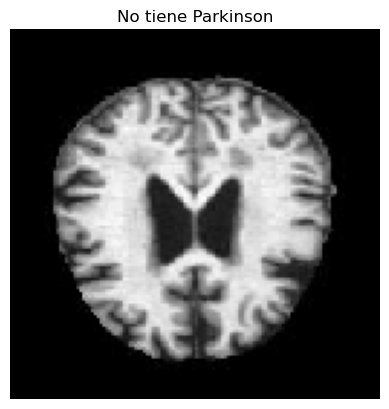

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Ruta del modelo CNN previamente entrenado
cnn_model_path = '/home/crakerool/Parkinson UCN/Parkinson/models/cnn_model.h5'

# Cargar el modelo CNN
model = load_model(cnn_model_path)

# Función para preprocesar la imagen cargada
def preprocess_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalización al rango [0, 1]
    return img_array

# Función para hacer una predicción sobre una imagen
def predict_parkinson(img_path):
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)
    if prediction[0] > 0.5:
        result = "No tiene Parkinson"
    else:
        result = "Tiene Parkinson"
    return result

# Función para cargar y visualizar la imagen junto con la predicción
def display_prediction(img_path):
    result = predict_parkinson(img_path)
    img = image.load_img(img_path, target_size=(128, 128))
    plt.imshow(img)
    plt.title(result)
    plt.axis('off')
    plt.show()
# Ejemplo de uso: subir una imagen y predecir
if __name__ == "__main__":
    # Cambiar esta ruta por la imagen que se desea predecir
    test_image_path = r"/home/crakerool/64a4e226-383f-4fa5-a14a-ad3aea5916c1.jpeg"
    display_prediction(test_image_path)
